In [2]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np 
import h5py


In /home/tushar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tushar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tushar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/tushar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/tushar/.local/lib/python3.6/site-packages/matplotlib/mpl-data/s

In [27]:
#  importing required datasets
# red sea dataset
fn = ' /home/tushar/iisc/gav/project/dataset/0001/COMBINED_2011013100.nc'
sea_ds = nc.Dataset(fn)
# eddy visualization dataset
fn = '/home/tushar/iisc/gav/project/dataset/ensemble1Eddies.nc'
eddy_ds = nc.Dataset(fn)
print(eddy_ds)
print(sea_ds)
#Bathymetry data
f = h5py.File('/home/tushar/iisc/gav/project/dataset/bathymetry.h5', 'r')
bathy_ds = np.array(f['Data0'])

#Bathymetry data nc file
fn = '/home/tushar/iisc/gav/project/dataset/bathymetry.nc'
bathy_ncds = nc.Dataset(fn)
print(bathy_ncds)
y = bathy_ncds['sea_bed'][:]
print(np.count_nonzero(y==1))



<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    dimensions(sizes): time(60), latitude(500), longitude(500), depth(50)
    variables(dimensions): float64 time(time), float32 latitude(latitude), float32 longitude(longitude), float32 depth(depth), int8 isEddy(time, depth, latitude, longitude)
    groups: 
<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    CDI: Climate Data Interface version 1.9.3 (http://mpimet.mpg.de/cdi)
    Conventions: CF-1.6
    history: Fri Sep 06 14:15:32 2019: cdo mergetime COMBINED_2011010106.nc COMBINED_2011010118.nc COMBINED_2011010206.nc COMBINED_2011010218.nc COMBINED_2011010306.nc COMBINED_2011010318.nc COMBINED_2011010406.nc COMBINED_2011010418.nc COMBINED_2011010506.nc COMBINED_2011010518.nc COMBINED_2011010606.nc COMBINED_2011010618.nc COMBINED_2011010706.nc COMBINED_2011010718.nc COMBINED_2011010806.nc COMBINED_2011010818.nc COMBINED_2011010906.nc COMBI

<IPython.core.display.Javascript object>


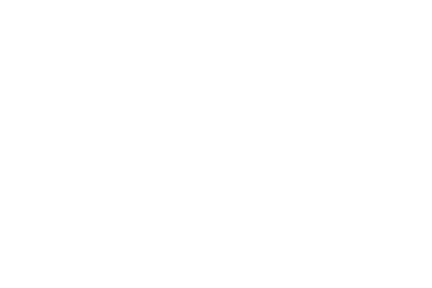

<IPython.core.display.Javascript object>


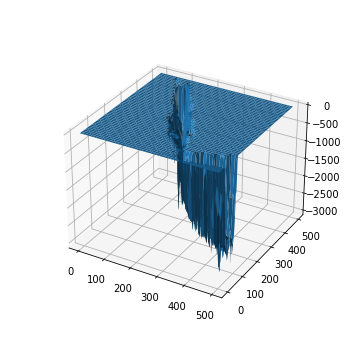

In [87]:
# Reading datasets 

#print(eddy_ds)
# print(sea_ds)
# for var in sea_ds.variables.values():
#     print(var)

# print(eddy_vis_ds['depth'][:])
# print(ds['Z_MIT40'][:])
vol =  np.zeros((50,500,500))
sea_depth = bathy_ds * (-1)
a = np.array(sea_ds['Z_MIT40'])
for i  in range(500):
    for j in range(500):
        key = sea_depth[0,i,j]
        index = np.argmin(np.abs(a-key))
        if key > 0 :
            vol[index,i,j] = 1



data = np.array(bathy_ds[:,:,:])
X= np.arange(500)
Y= np.arange(500)
X,Y = np.meshgrid(X,Y)
Z = data[0,:,:]
fig = plt.figure()
plt.figure(figsize = (5,5))
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z)
plt.show()

<IPython.core.display.Javascript object>


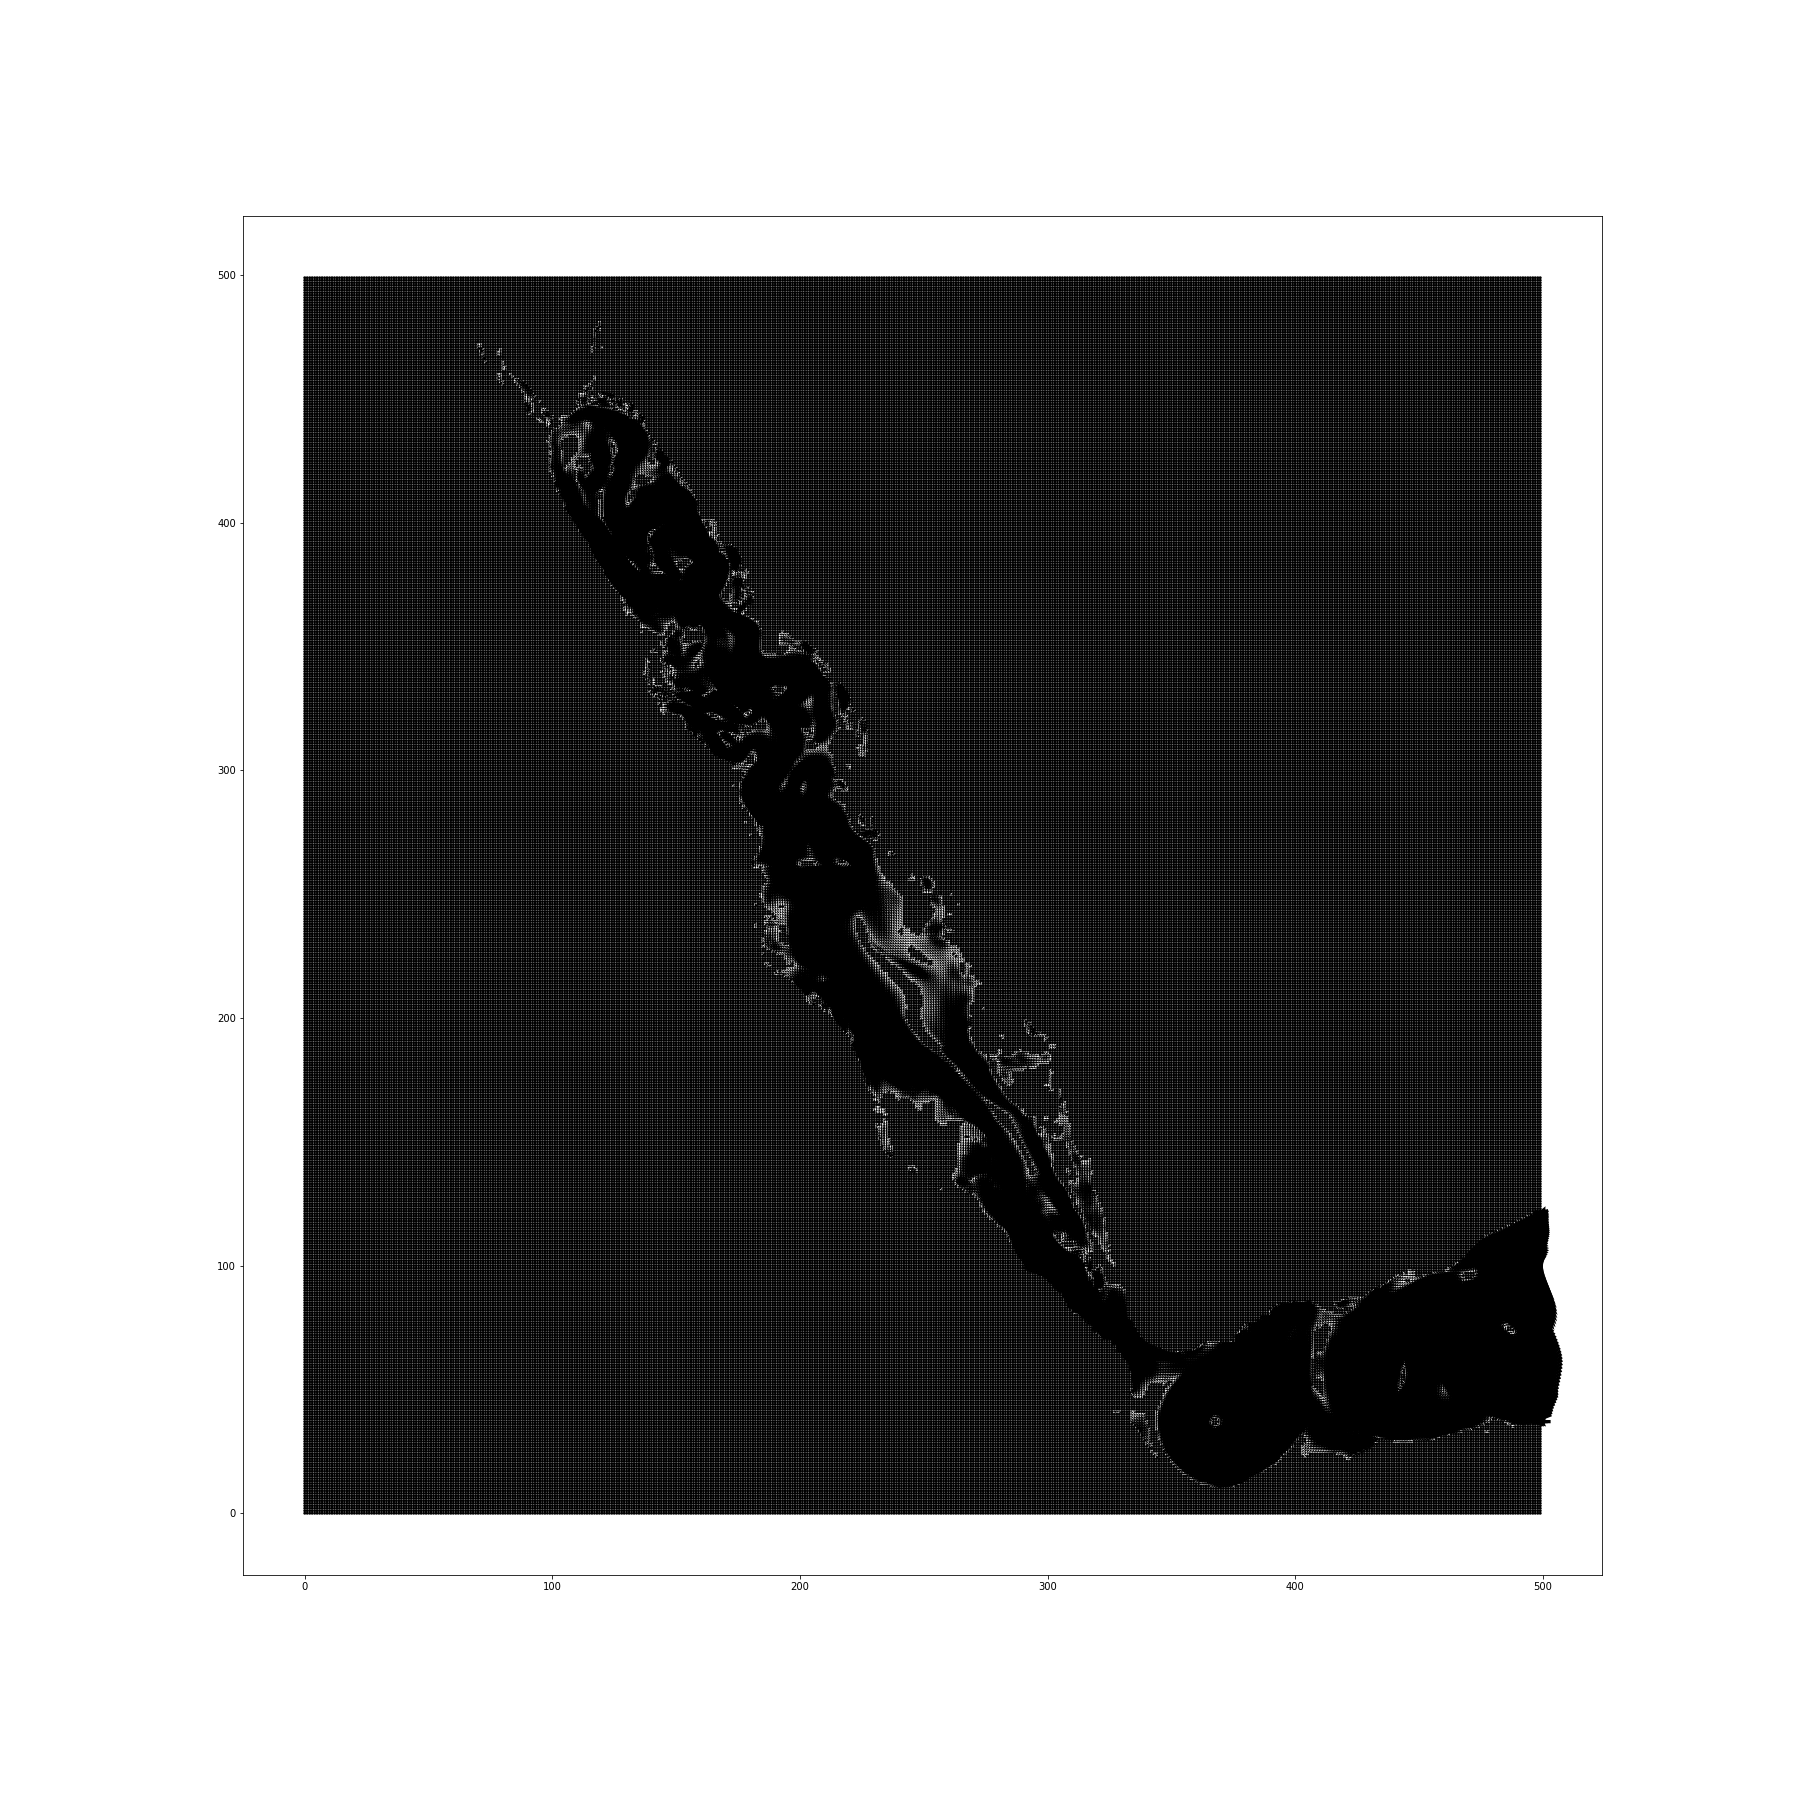

In [41]:
# Vector Field Visualization 
x=np.arange(500)
y=np.arange(500)
x,y = np.meshgrid(x,y)
plt.figure(figsize = (25,25))
plt.quiver(x,y,ds['U'][0,0,:,:],ds['V'][0,0,:,:],pivot="middle")
plt.axis("scaled")

plt.show()


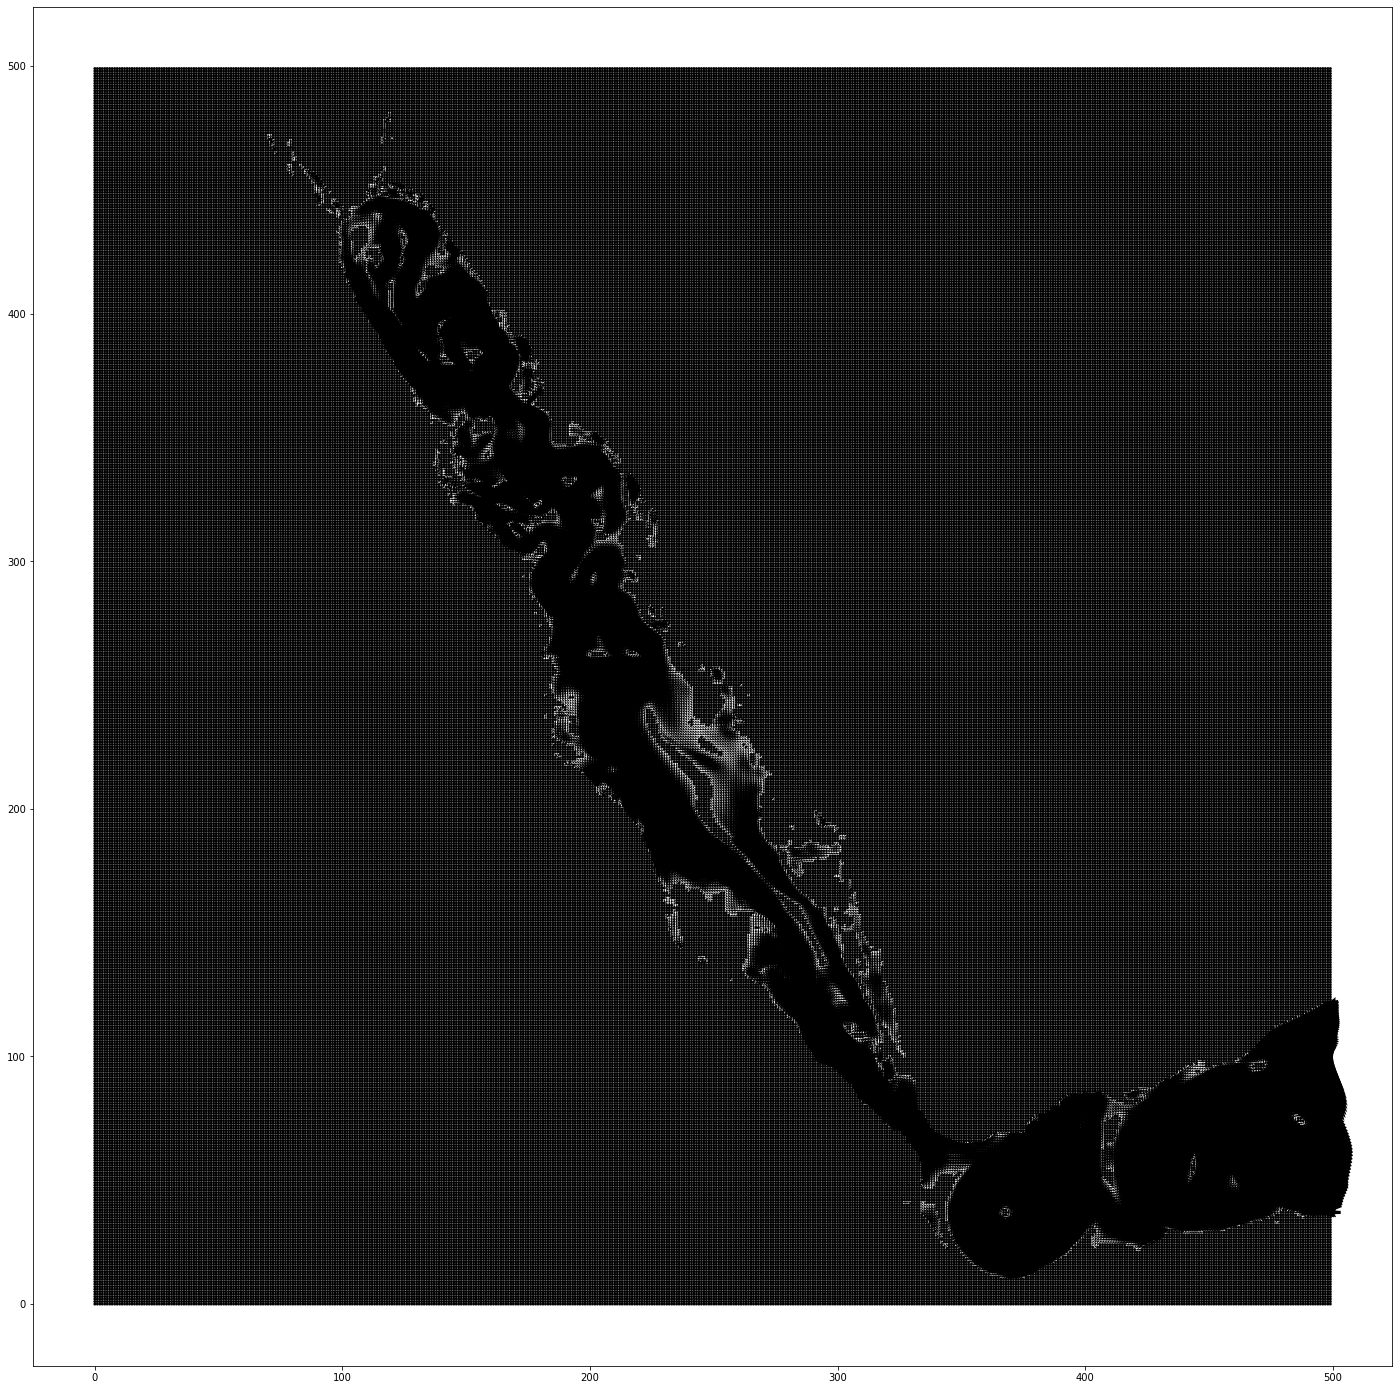

In [26]:
#Creating netcdf for bathymetry 
file1 = '/home/tushar/iisc/gav/project/dataset/0001/COMBINED_2011013100.nc'
file2 = '/home/tushar/iisc/gav/project/dataset/bathymetry.nc'

# creating numpy volume format of bathymetry data
vol =  np.zeros((50,500,500))
sea_depth = bathy_ds * (-1)
a = np.array(sea_ds['Z_MIT40'])
for i  in range(500):
    for j in range(500):
        key = sea_depth[0,i,j]
        index = np.argmin(np.abs(a-key))
        y=vol[max(1,index - 8):min(50,index+8),max(1,index - 8):min(500,index+8),max(1,index - 8):min(500,index+8)]
        flag = np.count_nonzero(y==1)
        if(a[index] > 0 or flag > 0):
            vol[index,i,j] = 1


bathy_nds = nc.Dataset(file2, 'w', format='NETCDF4')
lat = bathy_nds.createDimension('latitude', 500)
lon = bathy_nds.createDimension('longitude', 500)
dep = bathy_nds.createDimension('depth', 50)

                         
deps = bathy_nds.createVariable('depth', 'f4', ('depth',))
lats =  bathy_nds.createVariable('latitude', 'f4', ('latitude',))
lons =  bathy_nds.createVariable('longitude', 'f4', ('longitude',))
sea_bed =  bathy_nds.createVariable('sea_bed', 'i1', ('depth', 'latitude', 'longitude',))
sea_bed.units = 'Unknown'

lons[:] = sea_ds['XC'][:]
lats[:] = sea_ds['YC'][:]
deps[:] = sea_ds['Z_MIT40'][:]

sea_bed[:,:,:] = vol[:,:,:]
bathy_nds.close()
# with nc.Dataset(file1) as src, nc.Dataset(file2, "w") as dst:
#  # copy attributes
#   for name in src.ncattrs():
#     dst.setncattr(name, src.getncattr(name))
#   # copy dimensions
#   for name, dimension in src.dimensions.items():
#     if dimension.isunlimited():
#       dst.createDimension( name, None)
#     else:
#       dst.createDimension( name, len(dimension))
#   dst.createVariable('sea_bed','i',('Z_MIT40', 'YC', 'XC')) 
#   dst.variables['sea_bed'][:] = vol[:]
#   for z in range(50):
#         for y in range(500):
#             for x in range(500):
#                 dst.variables['sea_bed'][z,y,x] = vol[z,y,x] 
                
  
  # copy all file data for variables that are included in the toinclude list
    
#   for name, variable in src.variables.iteritems():
#     if name in toinclude:
#       x = dst.createVariable(name, variable.datatype, variable.dimensions)
#       dst.variables[name][:] = src.variables[name][:]


In [59]:
#testing 
# print(eddy_ds)
# print(sea_ds)
# print(np.amin(bathy_ds[0,:,:]))
# print(np.amin(sea_ds['Z_MIT40'][:]))
a = [25.75443, 26.7803, 25.79099, 24.17642, 24.3526, 22.79056, 20.84866, 19.49222, 18.38086, 18.0358, 16.57819, 15.71255, 14.79059, 13.64154, 13.09409, 12.18347, 11.33447, 10.32184, 9.544922, 8.813385, 8.181152, 6.983734, 6.048035, 5.505096, 4.65799]

index = np.argmin(np.abs(np.array(a)-22.5))
print(a[index])

22.79056
